In [1]:
square_meter = [1500, 1700, 2000, 1200, 1800, 2500,  1300, 1950, 2150, 1100, 2300, 3100, 1200, 1650, 2000, 1450, 2600, 1400, 2200, 2700, 1300, 1950, 2150, 1100, 2300, 3100, 1200, 1650, 2000, 1450, 2600]
number_of_rooms = [3, 2, 3, 2, 4, 3, 2, 3, 4, 2, 3, 4, 2, 3, 4, 3, 2, 4, 3, 2, 3, 4, 2, 3, 4, 2, 2, 3, 4, 2, 2]
number_of_bathrooms = [1, 1, 2, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2]
year = [2010, 2015, 2012, 2018, 2013, 2017, 2017, 2014, 2016, 2019, 2011, 2015, 2017, 2016, 2018, 2020, 2019, 2014, 2016, 2019, 2011, 2015, 2017, 2016, 2018, 2020, 2019, 2012, 2014, 2013, 2015]
price = [200000, 220000, 250000, 180000, 280000, 320000, 190000, 300000, 400000, 210000, 270000, 330000, 200000, 250000, 180000, 280000, 320000, 190000, 300000, 400000, 210000, 270000, 330000, 200000, 350000, 450000, 220000, 260000, 310000, 190000, 380000]

In [2]:
import pandas as pd

In [3]:
import csv
data = list(zip(square_meter, number_of_rooms, number_of_bathrooms, price, year))

with open('home_prices.csv', mode='w', newline='') as folder:
    printer = csv.writer(folder)
    printer.writerow(['Square Meter', 'Number of Rooms', 'Number of Bathrooms', 'Price ($)', 'Year'])
    printer.writerows(data)

print('The CSV file has been successfully created: "home_prices.csv"')

The CSV file has been successfully created: "home_prices.csv"


In [4]:
df = pd.read_csv("home_prices.csv")

"We read the CSV file."

In [5]:
df.head()

,Square Meter,Number of Rooms,Number of Bathrooms,Price ($),Year
0,1500,3,1,200000,2010
1,1700,2,1,220000,2015
2,2000,3,2,250000,2012
3,1200,2,1,180000,2018
4,1800,4,2,280000,2013


"Our first five data entries."

In [6]:
df.corr()

,Square Meter,Number of Rooms,Number of Bathrooms,Price ($),Year
Square Meter,1.000000,0.141309,0.353574,0.840423,0.138685
Number of Rooms,0.141309,1.000000,0.375833,0.061081,-0.330987
Number of Bathrooms,0.353574,0.375833,1.000000,0.302339,-0.203050
Price ($),0.840423,0.061081,0.302339,1.000000,0.275947
Year,0.138685,-0.330987,-0.203050,0.275947,1.000000


"There is a correlation of 0.84 between square meters and price, indicating a high-level relationship."

"There is a correlation of 0.37 between the number of rooms and the number of bathrooms, indicating a moderate-level relationship."

"There is a correlation of 0.06 between price and the number of rooms, indicating a low-level relationship."

"There is a correlation of -0.33 between the year and the number of rooms, indicating a moderate-level negative relationship."

In [7]:
df.describe()

,Square Meter,Number of Rooms,Number of Bathrooms,Price ($),Year
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1890.322581,2.870968,1.709677,272258.064516,2015.677419
std,574.081782,0.805892,0.642575,73833.582125,2.785523
min,1100.000000,2.000000,1.000000,180000.000000,2010.000000
25%,1425.000000,2.000000,1.000000,205000.000000,2014.000000
50%,1950.000000,3.000000,2.000000,270000.000000,2016.000000
75%,2250.000000,3.500000,2.000000,320000.000000,2018.000000
max,3100.000000,4.000000,3.000000,450000.000000,2020.000000


"Prices range from $180,000 to $450,000."

"The number of rooms ranges from a minimum of 2 to a maximum of 4."

"The square footage ranges from a minimum of 1100 to a maximum of 3100."

"The average price of all homes is $270,370.37."

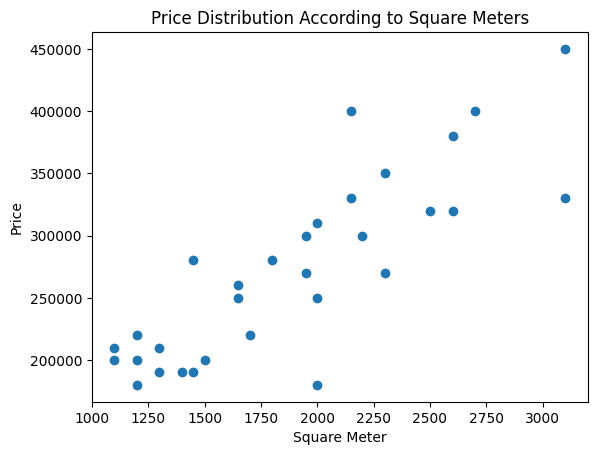

In [8]:
import matplotlib.pyplot as plt

plt.scatter(square_meter, price)
plt.title('Price Distribution According to Square Meters')
plt.xlabel('Square Meter')
plt.ylabel('Price')
plt.show()


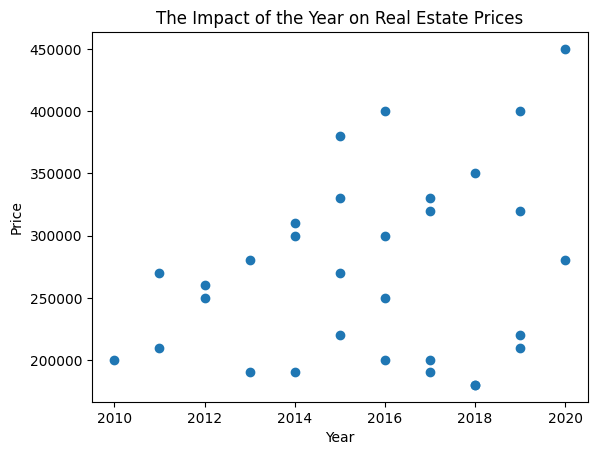

In [9]:
plt.scatter(year, price)
plt.title('The Impact of the Year on Real Estate Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


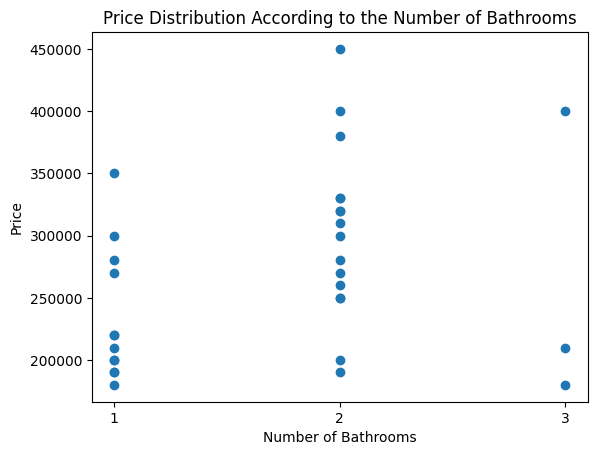

In [10]:
plt.scatter(number_of_bathrooms, price)
plt.title('Price Distribution According to the Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(range(1, 4))  # The x-axis will only display integer values. (1, 2, 3)
plt.show()


In [11]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Convert the dataset into a data frame
#pd.DataFrame() function creates a data frame. A dictionary data structure is used in it.
# The name of each column and the data corresponding to this column (square meter and price) are placed in this dictionary.
# As a result, a data frame named data is created and this data frame contains two columns named "Square Feet" and "Price".
# This data frame can be used to process and analyze data more easily
data = pd.DataFrame({
    'Square Meter': square_meter,
    'Price': price
})

# Selection of independent variable (X) and dependent variable (y)
X = data[['Square Meter']]
y = data['Price']

# Build and train linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate regression metrics
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)

# Calculate RMSLE
log_predictions = np.log1p(predictions)
log_real_values = np.log1p(y)
rmsle = sqrt(mean_squared_error(log_real_values, log_predictions))

# Show results as output
print("Mean Square Error (MSE):", mse)
print("R-squared value:", r2)
print("Mean Absolute Error (MAE):", mae)
print("RMSLE:", rmsle)


Mean Square Error (MSE): 1549375256.5384414
R-squared value: 0.7063099882572405
Mean Absolute Error (MAE): 31039.351681313474
RMSLE: 0.14324181428597252


Mean Square Error (MSE): 1,549,375,256.54 (MSE) measures the mean square of the differences between the predictions and the actual values. This value is high, which indicates that our model made large errors in some predictions.

R-squared value: 0.706 (R-squared) measures how much of the variance of the dependent variable is explained by the independent variables. It takes a value between 0 and 1, and the closer it is to 1, the better the model fits. This value of 0.706 indicates that our model explains the relationship between the independent variables and price by 70%. The model explains the data relatively well.

Mean Absolute Error (MAE): 31,039.35 (MAE) measures the average of the absolute differences of the predictions and actual values. This value indicates that the predictions deviate from the actual values by approximately 31,039 units on average.

RMSLE (Root Mean Squared Logarithmic Error): 0.143 (RMSLE) is the square root of the mean square of the logarithmic differences of the predictions and actual values. RMSLE is especially useful when working with data on a logarithmic scale, such as price forecasting. A lower RMSLE value indicates that the estimates are closer to the actual values.

As a result, our model seems to fit the data quite well. However, the MSE value is still quite high, which indicates that our model may make large errors in some predictions. We may consider adding different features or collecting more data to further improve our model.

In [12]:
print(len(square_meter), len(number_of_rooms), len(number_of_bathrooms), len(year), len(price))

31 31 31 31 31


In [13]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert the dataset into a data frame
data = pd.DataFrame({
    'Square Meter': square_meter,
    'Number of Rooms': number_of_rooms,
    'Number of Bathrooms': number_of_bathrooms,
    'Year': year,
    'Price': price
})

# Selection of independent variables (X) and dependent variable (y)
X = data[['Square Meter', 'Number of Rooms', 'Number of Bathrooms', 'Year']]
y = data['Price']

# Create polynomials of different degrees and calculate metrics
for degree in range(1, 6):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(X_poly)

    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)

    # RMSLE 
    log_predictions = np.log1p(predictions)
    log_real_values = np.log1p(y)
    rmsle = sqrt(mean_squared_error(log_real_values, log_predictions))

    print(f"MSE for Degree {degree}: {mse}")
    print(f"R^2 for Degree {degree}: {r2}")
    print(f"MAE for Degree {degree}: {mae}")
    print(f"RMSLE for Degree {degree}: {rmsle}")
    print("-------")


MSE for Degree 1: 1397503135.524839
R^2 for Degree 1: 0.7350979302458933
MAE for Degree 1: 27424.325884556758
RMSLE for Degree 1: 0.13691130799018605
-------
MSE for Degree 2: 797085828.0659653
R^2 for Degree 2: 0.8489093296044434
MAE for Degree 2: 23166.214546449723
RMSLE for Degree 2: 0.11186922920201438
-------
MSE for Degree 3: 10242404.21240879
R^2 for Degree 3: 0.9980585130679465
MAE for Degree 3: 1968.4910593340473
RMSLE for Degree 3: 0.012952114466300095
-------
MSE for Degree 4: 5202.4614287932545
R^2 for Degree 4: 0.9999990138535183
MAE for Degree 4: 57.43662225046465
RMSLE for Degree 4: 0.0002538038568138809
-------
MSE for Degree 5: 4.4837502026630025e-09
R^2 for Degree 5: 1.0
MAE for Degree 5: 4.9160372826360886e-05
RMSLE for Degree 5: 2.233984383452159e-10
-------


According to our results, the MAE and RMSLE metrics of degree 3 and degree 4 polynomials are quite low. This indicates that the model has good prediction performance. The degree 5 polynomial shows almost zero error in the MAE and RMSLE metrics, but has a high risk of overfitting.
When we examine the results, we observe that when we increase the complexity of the model by increasing the polynomial degree, both MSE and R^2 scores become better. However, using a degree 5 polynomial may indicate overfitting. Especially the results of degree 3 and degree 4 polynomials seem quite successful. Therefore, we may choose to tune our model using the degree 2 polynomial, avoiding higher degree polynomials.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Convert the dataset into a data frame
data = pd.DataFrame({
    'Square Meter': square_meter,
    'Number of Rooms': number_of_rooms,
    'Number of Bathrooms': number_of_bathrooms,
    'Year': year,
    'Price': price
})

# Selection of independent variables (X) and dependent variable (y)
X = data[['Square Meter', 'Number of Rooms', 'Number of Bathrooms', 'Year']]
y = data['Price']

# Build and train the KNN regression model (e.g. k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Make predictions
predictions = knn_model.predict(X)

# MSE, R^2, and MAE calculate scores
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)

print("KNN Model - MSE:", mse)
print("KNN Model - R^2:", r2)
print("KNN Model - MAE:", mae)


KNN Model - MSE: 1458322580.6451614
KNN Model - R^2: 0.7235693715728431
KNN Model - MAE: 30064.516129032258


HIGH MSE AND MAE

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Convert the dataset into a data frame
data = pd.DataFrame({
    'Square Meter': square_meter,
    'Number of Rooms': number_of_rooms,
    'Number of Bathrooms': number_of_bathrooms,
    'Year': year,
    'Price': price
})

# Selection of independent variables (X) and dependent variable (y)
X = data[['Square Meter', 'Number of Rooms', 'Number of Bathrooms', 'Year']]
y = data['Price']

# Build and train the SVR model
svr_model = SVR(kernel='linear')  # Linear kernel can be used, other kernels can also be selected
svr_model.fit(X, y)

# Make predictions
tahminler = svr_model.predict(X)

# Calculate MSE, R^2, and MAE scores
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)

print("SVR Model - MSE:", mse)
print("SVR Model - R^2:", r2)
print("SVR Model - MAE:", mae)


SVR Model - MSE: 1458322580.6451614
SVR Model - R^2: 0.7235693715728431
SVR Model - MAE: 30064.516129032258


HIGH MSE AND MAE